   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male 

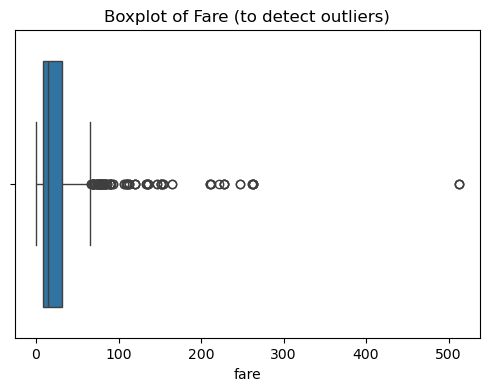

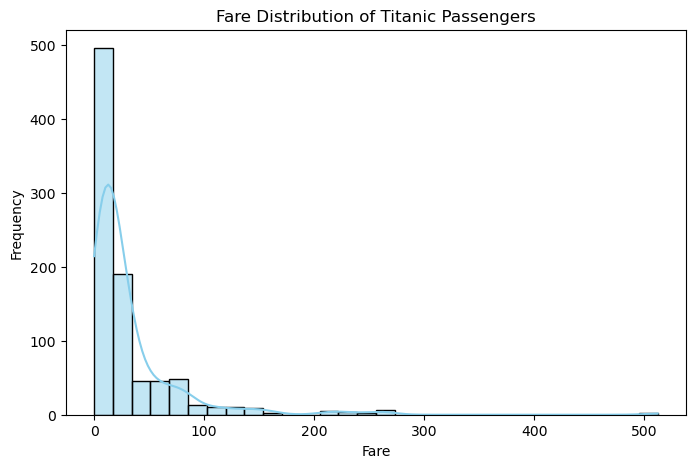

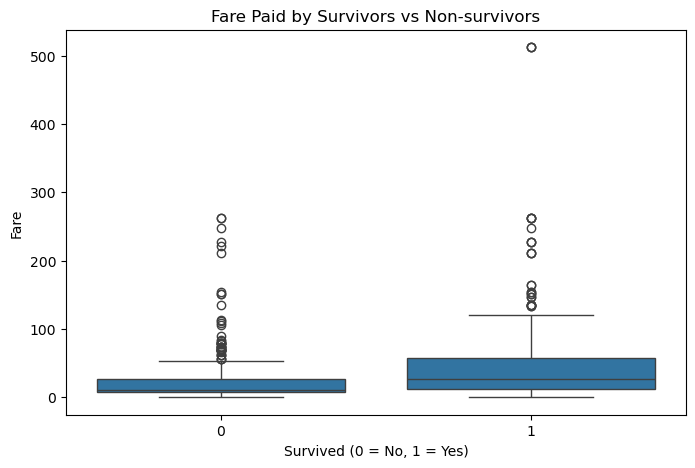

In [3]:
# Problem Statement: 
# 8 Data Visualization I
# 1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and
#    contains information about the passengers who boarded the
#    unfortunate Titanic ship. Use the Seaborn library to see if we can find
#    any patterns in the data.
# 2. Write a code to check how the price of the ticket (column name:
#    'fare') for each passenger is distributed by plotting a histogram.

# Import necessary libraries
import seaborn as sns                 # For loading the Titanic dataset and visualization
import pandas as pd                  # For data manipulation
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For plotting graphs
from sklearn.preprocessing import StandardScaler  # For scaling/normalization

# Step 1: Load the Titanic dataset using Seaborn
df = sns.load_dataset('titanic')

# Display the first 5 rows to understand the structure of the dataset
print(df.head())

# Step 2: Data Preprocessing

# a) Check for missing values in each column
print("\nMissing Values:\n", df.isnull().sum())

# b) Handle missing values

# Fill missing values in 'age' column with the median value of the 'age' column
df['age'] = df['age'].fillna(df['age'].median())

# Drop the 'deck' column since it has too many missing values
df.drop(columns=['deck'], inplace=True)

# Fill missing values in 'embarked' and 'embark_town' columns with their respective mode values
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Verify if all missing values have been handled
print("\nMissing Values After Handling:\n", df.isnull().sum())

# Step 3: Check for outliers in 'fare' using a boxplot

plt.figure(figsize=(6, 4))           # Set the size of the figure
sns.boxplot(x=df['fare'])            # Draw a boxplot to detect outliers in the 'fare' column
plt.title("Boxplot of Fare (to detect outliers)")
plt.show()

# Why outliers matter?
# Outliers can distort the mean and standard deviation.
# Example: If most fares are between 10-50 but one fare is 512, it affects the average drastically.

# Step 4: Scaling / Normalization

scaler = StandardScaler()            # Create a StandardScaler object
df['fare_scaled'] = scaler.fit_transform(df[['fare']])  # Scale the 'fare' column

# Step 5: Visualize the distribution of 'fare' using a histogram

plt.figure(figsize=(8, 5))           # Set the figure size
sns.histplot(df['fare'], bins=30, kde=True, color='skyblue')  # Plot histogram with KDE curve
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Step 6: Explore pattern - Compare fare with survival status

plt.figure(figsize=(8, 5))           # Set the figure size
sns.boxplot(x='survived', y='fare', data=df)  # Compare fare paid by survivors vs non-survivors
plt.title("Fare Paid by Survivors vs Non-survivors")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()
